In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



#Data Loading and Exploreation

In [4]:
file_path = '/content/drive/MyDrive/Colab Notebooks/TAF_Techies_Dataset.xlsx'
order_df = pd.read_excel(file_path, sheet_name='Order Details')
prod_df = pd.read_excel(file_path, sheet_name='Product Details')

In [5]:
order_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Sales,Quantity,Discount,Profit,Region,State
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,261.9600,2,0.00,41.9136,South,Kentucky
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,731.9400,3,0.00,219.5820,South,Kentucky
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,14.6200,2,0.00,6.8714,West,California
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,957.5775,5,0.45,-383.0310,South,Florida
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,22.3680,2,0.20,2.5164,South,Florida
...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,25.2480,3,0.20,4.1028,South,Florida
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,91.9600,2,0.00,15.6332,West,California
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,258.5760,2,0.20,19.3932,West,California
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,29.6000,4,0.00,13.3200,West,California


In [6]:
prod_df

,Row ID,Order ID,Product purchased,Category,Sub-Category,Sales,Quantity
0,1,CA-2016-152156,FUR-BO-10001798|Bush Somerset Collection Bookcase,Furniture,Bookcases,261.9600,2
1,2,CA-2016-152156,FUR-CH-10000454|Hon Deluxe Fabric Upholstered ...,Furniture,Chairs,731.9400,3
2,3,CA-2016-138688,OFF-LA-10000240|Self-Adhesive Address Labels f...,Office Supplies,Labels,14.6200,2
3,4,US-2015-108966,FUR-TA-10000577|Bretford CR4500 Series Slim Re...,Furniture,Tables,957.5775,5
4,5,US-2015-108966,OFF-ST-10000760|Eldon Fold 'N Roll Cart System,Office Supplies,Storage,22.3680,2
...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,FUR-FU-10001889|Ultra Door Pull Handle,Furniture,Furnishings,25.2480,3
9990,9991,CA-2017-121258,FUR-FU-10000747|Tenex B1-RE Series Chair Mats ...,Furniture,Furnishings,91.9600,2
9991,9992,CA-2017-121258,TEC-PH-10003645|Aastra 57i VoIP phone,Technology,Phones,258.5760,2
9992,9993,CA-2017-121258,OFF-PA-10004041|It's Hot Message Books with St...,Office Supplies,Paper,29.6000,4


In [7]:
list(prod_df['Order ID']) == list(order_df['Order ID'])

True

In [8]:
list(prod_df['Sales']) == list(order_df['Sales'])

True

In [9]:
list(prod_df['Quantity']) == list(order_df['Quantity'])

True

In [10]:
prod_df = prod_df.drop("Order ID", axis = 1)
prod_df = prod_df.drop("Sales", axis = 1)
prod_df = prod_df.drop("Quantity", axis = 1)

In [11]:
prod_df

,Row ID,Product purchased,Category,Sub-Category
0,1,FUR-BO-10001798|Bush Somerset Collection Bookcase,Furniture,Bookcases
1,2,FUR-CH-10000454|Hon Deluxe Fabric Upholstered ...,Furniture,Chairs
2,3,OFF-LA-10000240|Self-Adhesive Address Labels f...,Office Supplies,Labels
3,4,FUR-TA-10000577|Bretford CR4500 Series Slim Re...,Furniture,Tables
4,5,OFF-ST-10000760|Eldon Fold 'N Roll Cart System,Office Supplies,Storage
...,...,...,...,...
9989,9990,FUR-FU-10001889|Ultra Door Pull Handle,Furniture,Furnishings
9990,9991,FUR-FU-10000747|Tenex B1-RE Series Chair Mats ...,Furniture,Furnishings
9991,9992,TEC-PH-10003645|Aastra 57i VoIP phone,Technology,Phones
9992,9993,OFF-PA-10004041|It's Hot Message Books with St...,Office Supplies,Paper


In [12]:
merged_df = pd.merge(order_df, prod_df, on='Row ID')
merged_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Sales,Quantity,Discount,Profit,Region,State,Product purchased,Category,Sub-Category
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,261.9600,2,0.00,41.9136,South,Kentucky,FUR-BO-10001798|Bush Somerset Collection Bookcase,Furniture,Bookcases
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,731.9400,3,0.00,219.5820,South,Kentucky,FUR-CH-10000454|Hon Deluxe Fabric Upholstered ...,Furniture,Chairs
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,14.6200,2,0.00,6.8714,West,California,OFF-LA-10000240|Self-Adhesive Address Labels f...,Office Supplies,Labels
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,957.5775,5,0.45,-383.0310,South,Florida,FUR-TA-10000577|Bretford CR4500 Series Slim Re...,Furniture,Tables
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,22.3680,2,0.20,2.5164,South,Florida,OFF-ST-10000760|Eldon Fold 'N Roll Cart System,Office Supplies,Storage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,25.2480,3,0.20,4.1028,South,Florida,FUR-FU-10001889|Ultra Door Pull Handle,Furniture,Furnishings
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,91.9600,2,0.00,15.6332,West,California,FUR-FU-10000747|Tenex B1-RE Series Chair Mats ...,Furniture,Furnishings
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,258.5760,2,0.20,19.3932,West,California,TEC-PH-10003645|Aastra 57i VoIP phone,Technology,Phones
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,29.6000,4,0.00,13.3200,West,California,OFF-PA-10004041|It's Hot Message Books with St...,Office Supplies,Paper


In [13]:
output_csv = 'merged_data.csv'
merged_df.to_csv(output_csv, index=False)

print(f"Merged data saved to {output_csv}")

Merged data saved to merged_data.csv


In [75]:
df = pd.read_csv('merged_data.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Sales,Quantity,Discount,Profit,Region,State,Product purchased,Category,Sub-Category
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,261.9600,2,0.00,41.9136,South,Kentucky,FUR-BO-10001798|Bush Somerset Collection Bookcase,Furniture,Bookcases
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,731.9400,3,0.00,219.5820,South,Kentucky,FUR-CH-10000454|Hon Deluxe Fabric Upholstered ...,Furniture,Chairs
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,14.6200,2,0.00,6.8714,West,California,OFF-LA-10000240|Self-Adhesive Address Labels f...,Office Supplies,Labels
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,957.5775,5,0.45,-383.0310,South,Florida,FUR-TA-10000577|Bretford CR4500 Series Slim Re...,Furniture,Tables
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,22.3680,2,0.20,2.5164,South,Florida,OFF-ST-10000760|Eldon Fold 'N Roll Cart System,Office Supplies,Storage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,25.2480,3,0.20,4.1028,South,Florida,FUR-FU-10001889|Ultra Door Pull Handle,Furniture,Furnishings
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,91.9600,2,0.00,15.6332,West,California,FUR-FU-10000747|Tenex B1-RE Series Chair Mats ...,Furniture,Furnishings
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,258.5760,2,0.20,19.3932,West,California,TEC-PH-10003645|Aastra 57i VoIP phone,Technology,Phones
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,29.6000,4,0.00,13.3200,West,California,OFF-PA-10004041|It's Hot Message Books with St...,Office Supplies,Paper


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Row ID             9994 non-null   int64  
 1   Order ID           9994 non-null   object 
 2   Order Date         9994 non-null   object 
 3   Ship Date          9994 non-null   object 
 4   Ship Mode          9994 non-null   object 
 5   Sales              9994 non-null   float64
 6   Quantity           9994 non-null   int64  
 7   Discount           9994 non-null   float64
 8   Profit             9994 non-null   float64
 9   Region             9994 non-null   object 
 10  State              9994 non-null   object 
 11  Product purchased  9994 non-null   object 
 12  Category           9994 non-null   object 
 13  Sub-Category       9994 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB


In [16]:
df.describe()

,Row ID,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,229.858001,3.789574,0.156203,28.656896
std,2885.163629,623.245101,2.225110,0.206452,234.260108
min,1.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,22638.480000,14.000000,0.800000,8399.976000


In [17]:
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [18]:
df["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [19]:
df["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [20]:
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [21]:
df["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

#Sales-Profit Analysis

In [22]:
total_sales = df["Sales"].sum()
total_sales

2297200.8603000003

In [23]:
total_profit = df["Profit"].sum()
total_profit

286397.0217

In [24]:
total_profit_perc = (total_profit/total_sales)*100
print(f"{total_profit_perc:.2f} %")

12.47 %


In [25]:
sales_per_region = df.groupby('Region')['Sales'].sum()
sales_per_region

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

In [26]:
profit_per_region = df.groupby('Region')['Profit'].sum()
profit_per_region

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

In [27]:
sales_per_state = df.groupby('State')['Sales'].sum()
sales_per_state

State
Alabama                  19510.6400
Arizona                  35282.0010
Arkansas                 11678.1300
California              457687.6315
Colorado                 32108.1180
Connecticut              13384.3570
Delaware                 27451.0690
District of Columbia      2865.0200
Florida                  89473.7080
Georgia                  49095.8400
Idaho                     4382.4860
Illinois                 80166.1010
Indiana                  53555.3600
Iowa                      4579.7600
Kansas                    2914.3100
Kentucky                 36591.7500
Louisiana                 9217.0300
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76269.6140
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

In [28]:
profit_per_state = df.groupby('State')['Profit'].sum()
profit_per_state

State
Alabama                  5786.8253
Arizona                 -3427.9246
Arkansas                 4008.6871
California              76381.3871
Colorado                -6527.8579
Connecticut              3511.4918
Delaware                 9977.3748
District of Columbia     1059.5893
Florida                 -3399.3017
Georgia                 16250.0433
Idaho                     826.7231
Illinois               -12607.8870
Indiana                 18382.9363
Iowa                     1183.8119
Kansas                    836.4435
Kentucky                11199.6966
Louisiana                2196.1023
Maine                     454.4862
Maryland                 7031.1788
Massachusetts            6785.5016
Michigan                24463.1876
Minnesota               10823.1874
Mississippi              3172.9762
Missouri                 6436.2105
Montana                  1833.3285
Nebraska                 2037.0942
Nevada                   3316.7659
New Hampshire            1706.5028
New Jersey    

In [29]:
sales_per_cata = df.groupby('Category')['Sales'].sum()
sales_per_cata

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

In [30]:
profit_per_cata = df.groupby('Category')['Profit'].sum()
profit_per_cata

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

In [31]:
sales_per_sub_cata = df.groupby('Sub-Category')['Sales'].sum()
sales_per_sub_cata

Sub-Category
Accessories    167380.3180
Appliances     107532.1610
Art             27118.7920
Binders        203412.7330
Bookcases      114879.9963
Chairs         328449.1030
Copiers        149528.0300
Envelopes       16476.4020
Fasteners        3024.2800
Furnishings     91705.1640
Labels          12486.3120
Machines       189238.6310
Paper           78479.2060
Phones         330007.0540
Storage        223843.6080
Supplies        46673.5380
Tables         206965.5320
Name: Sales, dtype: float64

In [32]:
profit_per_sub_cata = df.groupby('Sub-Category')['Profit'].sum()
profit_per_sub_cata

Sub-Category
Accessories    41936.6357
Appliances     18138.0054
Art             6527.7870
Binders        30221.7633
Bookcases      -3472.5560
Chairs         26590.1663
Copiers        55617.8249
Envelopes       6964.1767
Fasteners        949.5182
Furnishings    13059.1436
Labels          5546.2540
Machines        3384.7569
Paper          34053.5693
Phones         44515.7306
Storage        21278.8264
Supplies       -1189.0995
Tables        -17725.4811
Name: Profit, dtype: float64

In [33]:
sales_per_ship_mode = df.groupby('Ship Mode')['Sales'].sum().apply(lambda x: round(x, 2))
sales_per_ship_mode

Ship Mode
First Class        351428.42
Same Day           128363.12
Second Class       459193.57
Standard Class    1358215.74
Name: Sales, dtype: float64

In [34]:
profit_per_ship_mode = df.groupby('Ship Mode')['Profit'].sum()
profit_per_ship_mode

Ship Mode
First Class        48969.8399
Same Day           15891.7589
Second Class       57446.6354
Standard Class    164088.7875
Name: Profit, dtype: float64

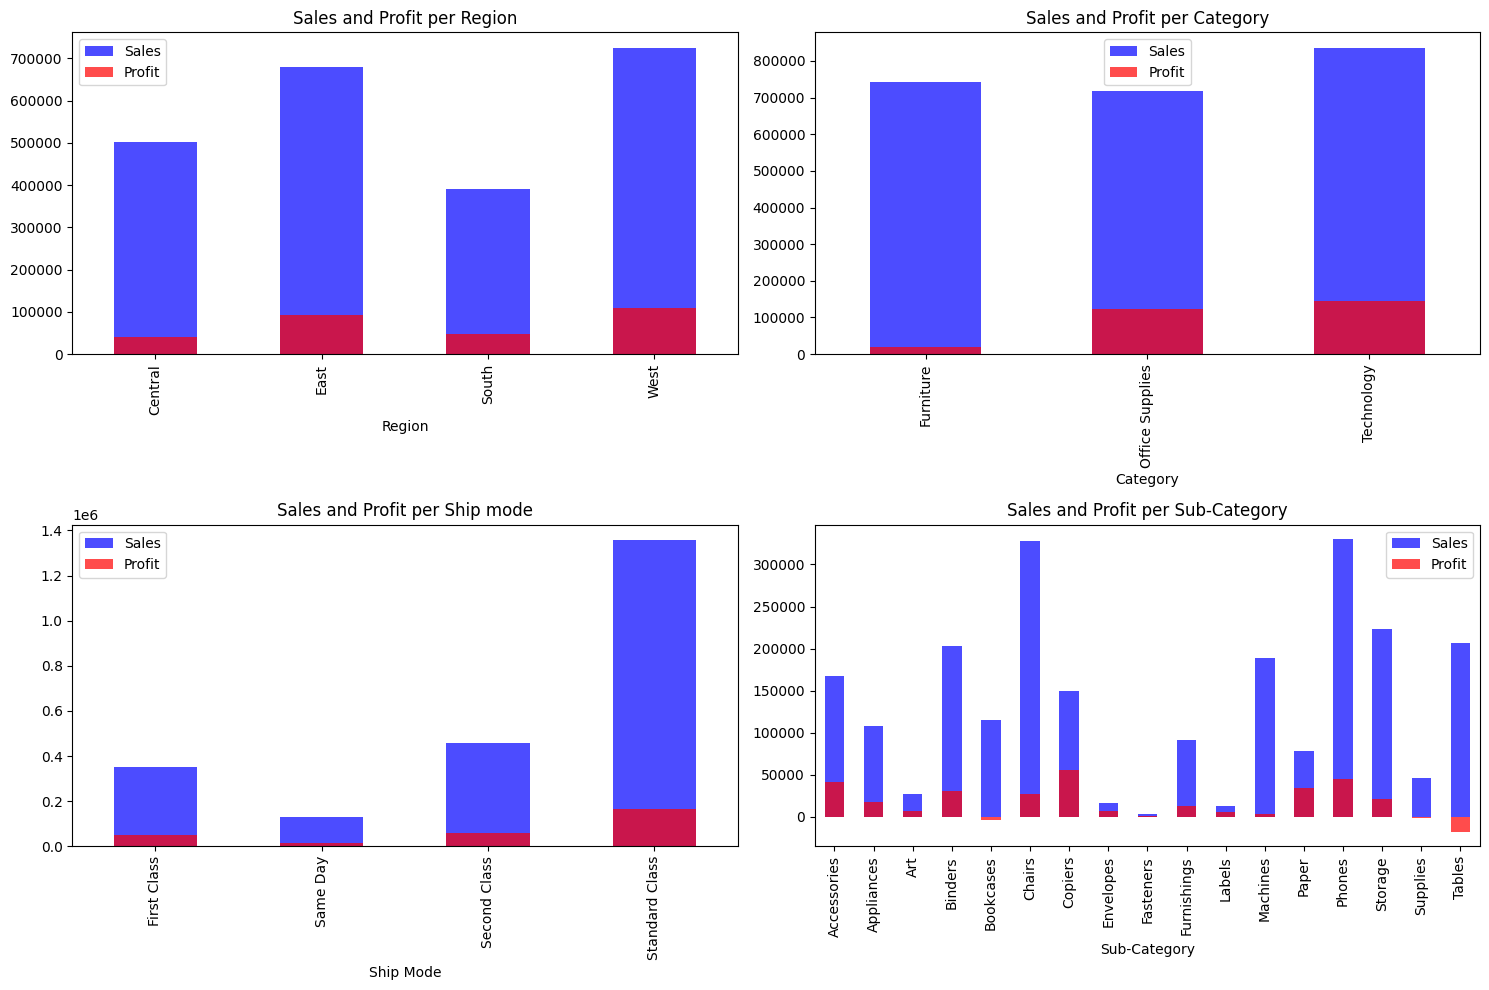

In [35]:
import matplotlib.pyplot as plt

fig1, axes1 = plt.subplots(2, 2, figsize=(15, 10))

sales_per_region.plot(kind='bar', ax=axes1[0, 0], color='b', alpha=0.7, label='Sales')
profit_per_region.plot(kind='bar', ax=axes1[0, 0], color='r', alpha=0.7, label='Profit')
axes1[0, 0].set_title('Sales and Profit per Region')
axes1[0, 0].legend()

sales_per_cata.plot(kind='bar', ax=axes1[0, 1], color='b', alpha=0.7, label='Sales')
profit_per_cata.plot(kind='bar', ax=axes1[0, 1], color='r', alpha=0.7, label='Profit')
axes1[0, 1].set_title('Sales and Profit per Category')
axes1[0, 1].legend()

sales_per_ship_mode.plot(kind='bar', ax=axes1[1, 0], color='b', alpha=0.7, label='Sales')
profit_per_ship_mode.plot(kind='bar', ax=axes1[1, 0], color='r', alpha=0.7, label='Profit')
axes1[1, 0].set_title('Sales and Profit per Ship mode')
axes1[1, 0].legend()

sales_per_sub_cata.plot(kind='bar', ax=axes1[1, 1], color='b', alpha=0.7, label='Sales')
profit_per_sub_cata.plot(kind='bar', ax=axes1[1, 1], color='r', alpha=0.7, label='Profit')
axes1[1, 1].set_title('Sales and Profit per Sub-Category')
axes1[1, 1].legend()

# axes[1, 1].axis('off')
# axes[2, 1].axis('off')
plt.tight_layout()
plt.show()


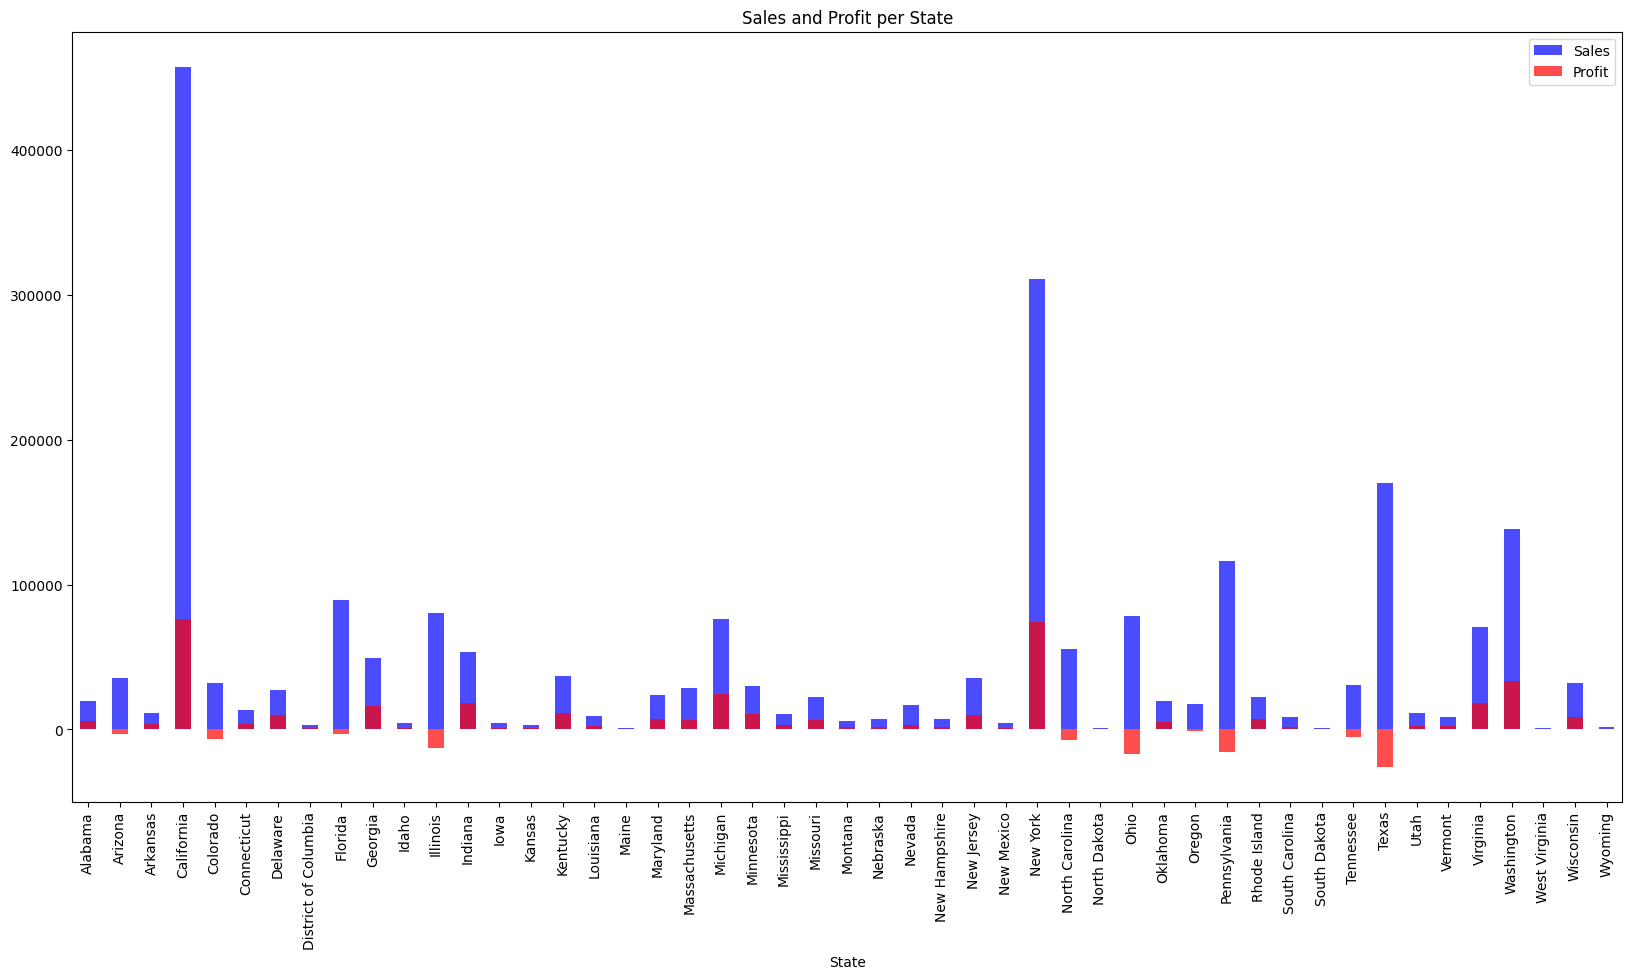

In [36]:
plt.figure(figsize=(20, 10))

sales_per_state.plot(kind='bar', color='b', alpha=0.7, label='Sales')
profit_per_state.plot(kind='bar', color='r', alpha=0.7, label='Profit')

plt.title('Sales and Profit per State')
plt.legend()
plt.show()

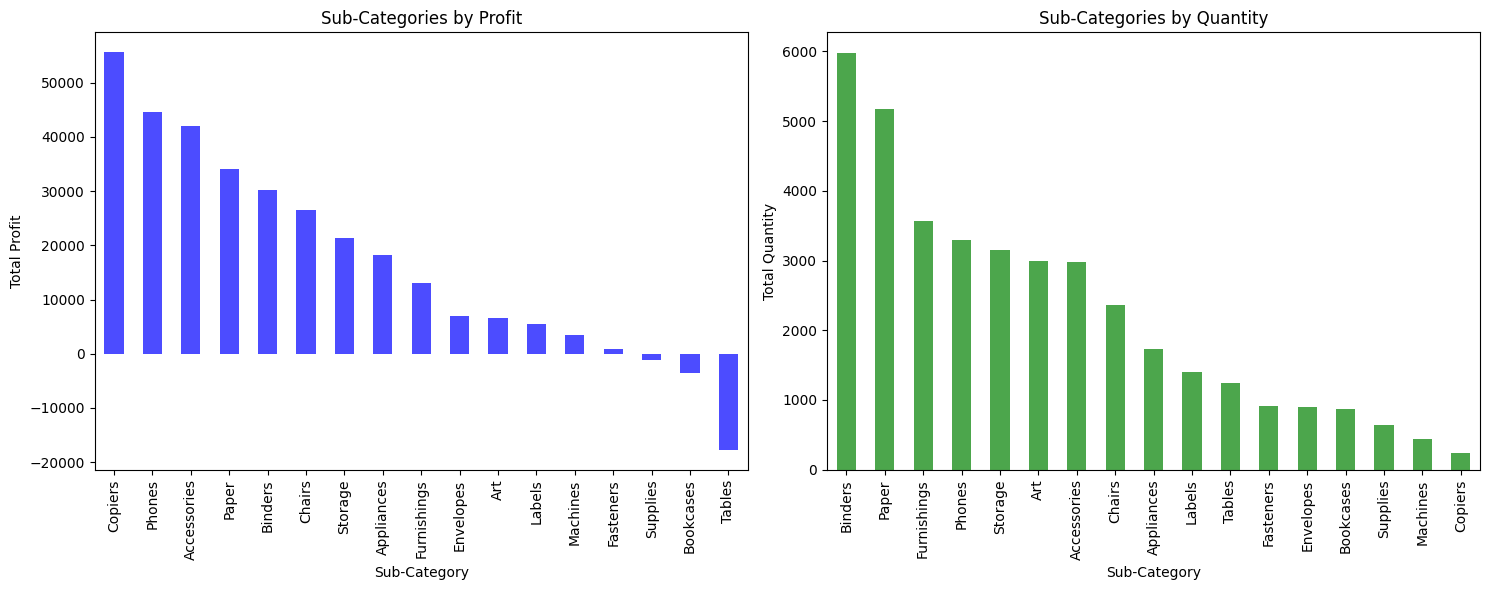

In [56]:
subcat_profit = df.groupby("Sub-Category")["Profit"].sum()
subcat_quantity = df.groupby("Sub-Category")["Quantity"].sum()

sorted_subcat_profit = subcat_profit.sort_values(ascending=False)
sorted_subcat_quantity = subcat_quantity.sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sorted_subcat_profit.plot(kind="bar", ax=axes[0], color="b", alpha=0.7)
axes[0].set_title("Sub-Categories by Profit")
axes[0].set_ylabel("Total Profit")

sorted_subcat_quantity.plot(kind="bar", ax=axes[1], color="g", alpha=0.7)
axes[1].set_title("Sub-Categories by Quantity")
axes[1].set_ylabel("Total Quantity")

# Adjust layout
plt.tight_layout()
plt.show()

In [53]:
most_profitable_product = df[df["Profit"] == df["Profit"].max()].iloc[0]
print("Most Profitable Product:\n", most_profitable_product)

Most Profitable Product:
 Row ID                                                            6827
Order ID                                                CA-2016-118689
Order Date                                                  2016-02-10
Ship Date                                                   2016-10-09
Ship Mode                                               Standard Class
Sales                                                         17499.95
Quantity                                                             5
Discount                                                           0.0
Profit                                                        8399.976
Region                                                         Central
State                                                          Indiana
Product purchased    TEC-CO-10004722|Canon imageCLASS 2200 Advanced...
Category                                                    Technology
Sub-Category                                       

In [55]:
most_bought_product = df[df["Quantity"] == df["Quantity"].max()].iloc[0]
print("Most Bought Product:\n", most_bought_product)

Most Bought Product:
 Row ID                                                             114
Order ID                                                CA-2014-115259
Order Date                                                  2014-08-25
Ship Date                                                   2014-08-27
Ship Mode                                                 Second Class
Sales                                                           40.096
Quantity                                                            14
Discount                                                           0.2
Profit                                                         14.5348
Region                                                            East
State                                                             Ohio
Product purchased    OFF-FA-10000621|OIC Colored Binder Clips, Asso...
Category                                               Office Supplies
Sub-Category                                           

In [107]:
subcat_profit["Accessories"]

41936.6357

In [109]:
subcat_profit_df = pd.DataFrame(subcat_profit)

In [97]:
subcat_profit_df  = subcat_profit_df[subcat_profit_df['Profit'] > 0 ]
subcat_profit_df

,Profit
Sub-Category,
Accessories,41936.6357
Appliances,18138.0054
Art,6527.7870
Binders,30221.7633
Chairs,26590.1663
Copiers,55617.8249
Envelopes,6964.1767
Fasteners,949.5182
Furnishings,13059.1436


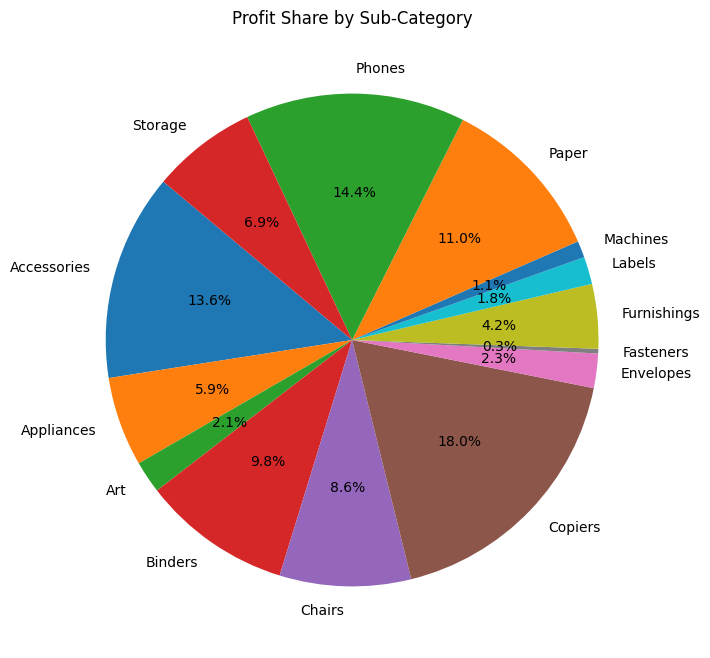

In [108]:
plt.figure(figsize=(8, 8))
plt.pie(subcat_profit_df['Profit'], labels=subcat_profit_df.index, autopct='%1.1f%%', startangle=140)
plt.title('Profit Share by Sub-Category')
plt.show()

In [78]:
temp_df = df
temp_df['Order Date'] = pd.to_datetime(temp_df['Order Date'])

temp_df['Month'] = temp_df['Order Date'].dt.strftime('%m')

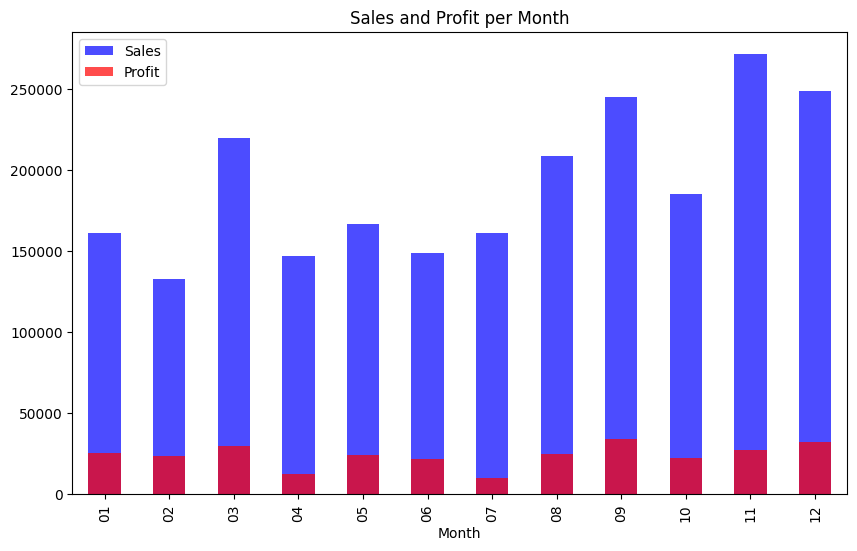

In [79]:
sales_per_month = temp_df.groupby('Month')['Sales'].sum()
profits_per_month = temp_df.groupby('Month')['Profit'].sum()

plt.figure(figsize=(10, 6))

sales_per_month.plot(kind='bar', color='b', alpha=0.7, label='Sales')
profits_per_month.plot(kind='bar', color='r', alpha=0.7, label='Profit')

plt.title('Sales and Profit per Month')
plt.legend()
plt.show()

In [80]:
temp_df = df
temp_df['Month'] = temp_df['Order Date'].dt.strftime('%Y-%m')

In [81]:
temp_df.set_index('Order Date', inplace=True)

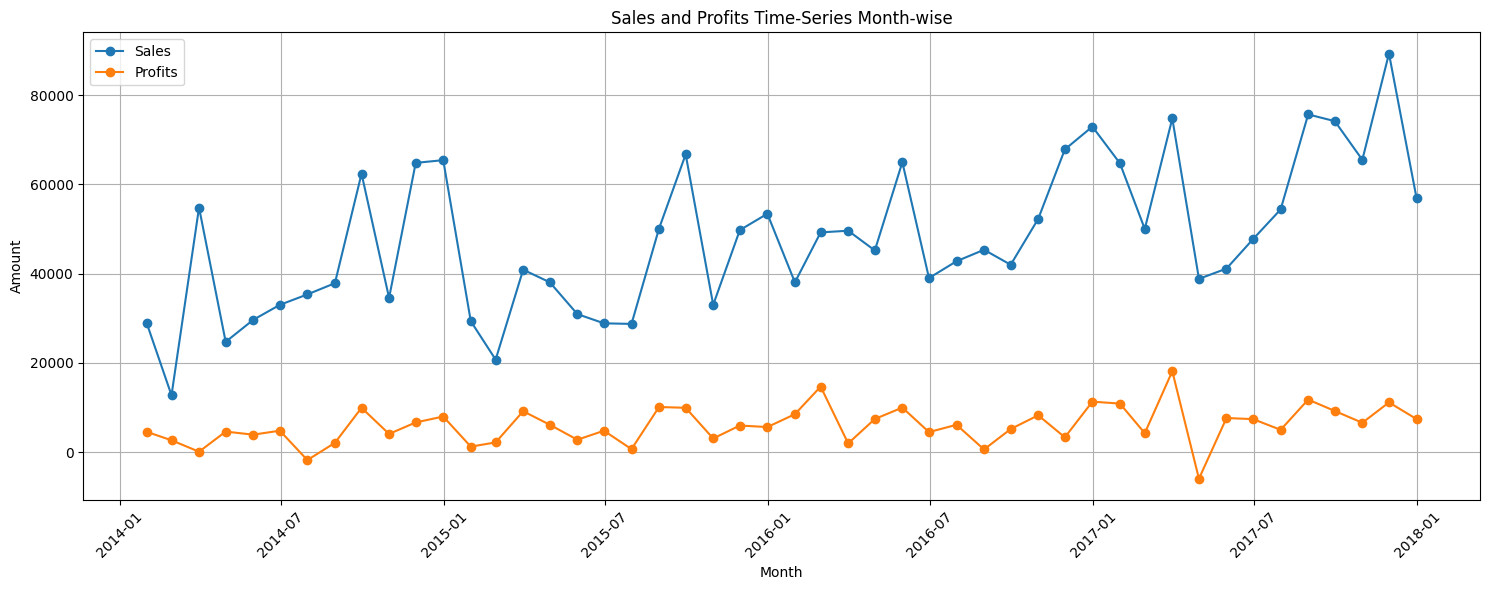

In [82]:
sales_per_month = temp_df.resample('M')['Sales'].sum()
profits_per_month = temp_df.resample('M')['Profit'].sum()

plt.figure(figsize=(15, 6))

plt.plot(sales_per_month.index, sales_per_month, label='Sales', marker='o')
plt.plot(profits_per_month.index, profits_per_month, label='Profits', marker='o')

plt.title('Sales and Profits Time-Series Month-wise')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#Shipping Mode Analysis

In [37]:
df_grouped = df.groupby(['Region', 'Ship Mode'])

ship_mode_counts = df_grouped['Order ID'].count()

df_temp = pd.DataFrame({'Ship Mode Count': ship_mode_counts})
df_temp = df_temp.sort_values(by=['Ship Mode Count'], ascending=False)

ship_mode_counts = df_temp['Ship Mode Count'].to_numpy()
region = df_temp.index.to_numpy()
ship_mode = df_temp.columns.to_numpy()[0]

temp = []
for i in range(len(region)):
    temp.append([region[i][0], region[i][1], ship_mode_counts[i]])
temp

[['West', 'Standard Class', 1882],
 ['East', 'Standard Class', 1673],
 ['Central', 'Standard Class', 1439],
 ['South', 'Standard Class', 974],
 ['West', 'Second Class', 621],
 ['East', 'Second Class', 530],
 ['West', 'First Class', 515],
 ['East', 'First Class', 490],
 ['Central', 'Second Class', 465],
 ['South', 'Second Class', 329],
 ['Central', 'First Class', 299],
 ['South', 'First Class', 234],
 ['West', 'Same Day', 185],
 ['East', 'Same Day', 155],
 ['Central', 'Same Day', 120],
 ['South', 'Same Day', 83]]

In [38]:
order_count = 0
for i in temp:
  order_count += i[2]
order_count

9994

In [39]:
data_new = []
for entry in temp:
    region = entry[0]
    delivery_type = entry[1]
    count = entry[2]

    region_entry = next((item for item in data_new if item['Region'] == region), None)

    if region_entry is None:
        region_entry = {'Region': region}
        data_new.append(region_entry)

    region_entry[delivery_type] = count

delivery_types = ['Standard Class', 'Second Class', 'First Class', 'Same Day']
for entry in data_new:
    for delivery_type in delivery_types:
        entry.setdefault(delivery_type, 0)
data_new

[{'Region': 'West',
  'Standard Class': 1882,
  'Second Class': 621,
  'First Class': 515,
  'Same Day': 185},
 {'Region': 'East',
  'Standard Class': 1673,
  'Second Class': 530,
  'First Class': 490,
  'Same Day': 155},
 {'Region': 'Central',
  'Standard Class': 1439,
  'Second Class': 465,
  'First Class': 299,
  'Same Day': 120},
 {'Region': 'South',
  'Standard Class': 974,
  'Second Class': 329,
  'First Class': 234,
  'Same Day': 83}]

In [40]:
ship_mode_count_by_region = pd.DataFrame(data_new, columns=['Region'] + delivery_types)
ship_mode_count_by_region

,Region,Standard Class,Second Class,First Class,Same Day
0,West,1882,621,515,185
1,East,1673,530,490,155
2,Central,1439,465,299,120
3,South,974,329,234,83


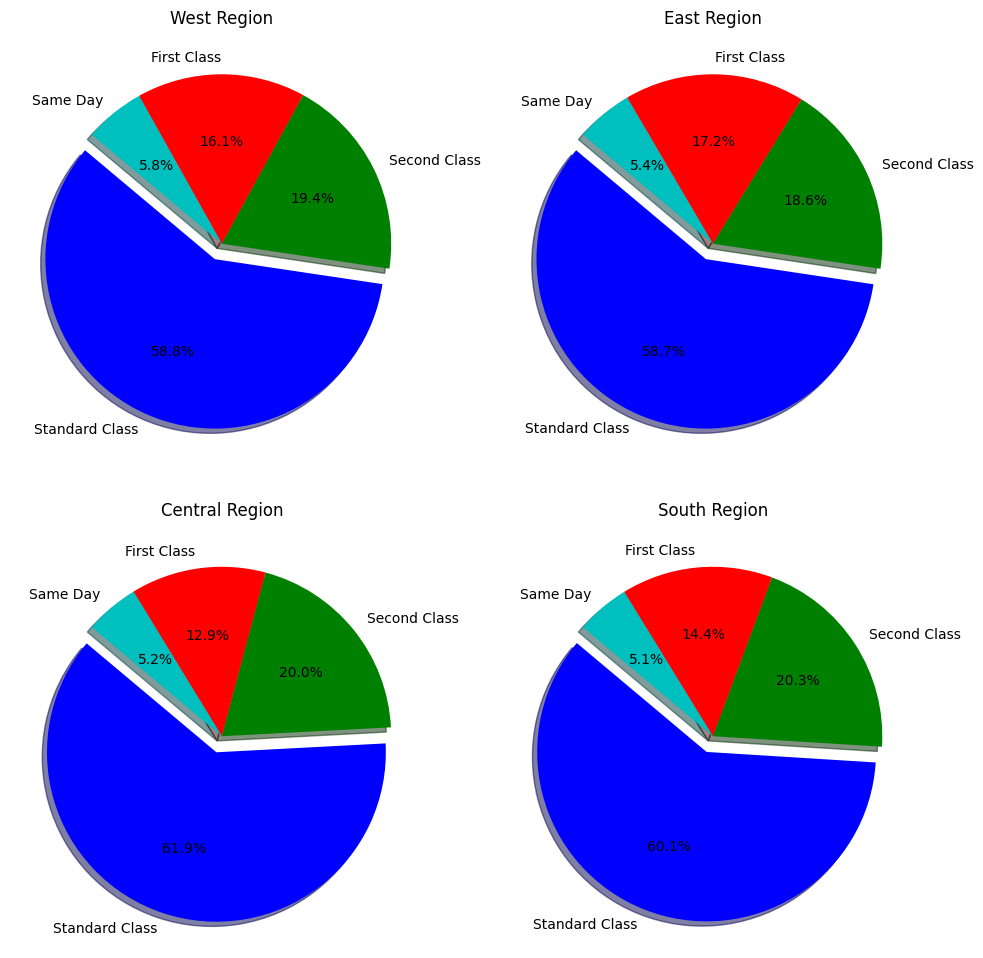

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes = axes.ravel()
for i, region in enumerate(ship_mode_count_by_region['Region']):
    labels = ship_mode_count_by_region.columns[1:]
    sizes = ship_mode_count_by_region.iloc[i, 1:]
    colors = ['b', 'g', 'r', 'c']
    explode = (0.1, 0, 0, 0)

    axes[i].pie(sizes, explode=explode, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=140)

    axes[i].set_title(f'{region} Region')

plt.tight_layout()
plt.show()
